# Loading the dataset

In [1]:
# Importing YData's packages
from ydata.platform.datasources import DataSources
from ydata.metadata import Metadata

# Creating a Dataset from the Data Source
datasource = DataSources.get(uid='5759d69f-e127-419d-a382-71d2cc01025a',
                             namespace='45685d15-0577-4001-834b-701ed6a52ad0')

dataset = datasource.read()
# Quickly previewing the Dataset
dataset.head()

/opt/conda/lib/python3.8/site-packages/distributed/client.py:1288: VersionMismatchWarning: Mismatched versions found

+---------+--------+-----------+---------+
| Package | client | scheduler | workers |
+---------+--------+-----------+---------+
| toolz   | 0.11.2 | 0.12.0    | None    |
+---------+--------+-----------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


,time,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft
idx,,,,,,,,,,,,,
0,0,1,CASH_IN,229382.36,C3568019779,67.45,229449.80,M1836583048,0.00,0.00,0,0,0
1,2099485,215,PAYMENT,3898.67,C7787814982,4330561.39,4326662.72,M8323358603,119874.35,123773.02,0,0,0
2,1422612,162,CASH_IN,328906.66,C5933160999,2738664.99,3067571.64,M5203480520,62420.96,62420.96,0,0,0
3,2771031,304,PAYMENT,5893.84,C4556212256,355476.10,349582.27,M7504842284,134119.24,140013.08,0,0,0
4,735308,41,CASH_IN,130091.39,C6471076107,2732966.80,2863058.19,M6673769831,8268.40,8268.40,0,0,0


# Exploring `isFlaggedFraud`

In [2]:
data = dataset.to_pandas()

In [3]:
flaggedFraud = data[data.isFlaggedFraud==1]

Our dataset does not have transfers flagged as fraud. Theoretically, it should be all transfers whose amount is above 200k. Let's check.

In [5]:
data[data.action == 'TRANSFER'].amount.max()

19814830.57

In [6]:
data.isFlaggedFraud.sum()

0

It seems during our generation we have disabled this. So this column is meaningless. 

In [8]:
del(flaggedFraud)

# Exploring `isFraud`

In [9]:
fraud = data[data.isFraud==1]

In [11]:
fraud.shape

(1390, 13)

In [14]:
data.shape

(3440390, 13)

In [15]:
(fraud.shape[0] / data.shape[0]) * 100

0.04040239623996116

Nice imbalance, buddy. 

In [16]:
fraud.head()

,time,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft
idx,,,,,,,,,,,,,
25922,2776215,305,TRANSFER,4050537.24,C9499500996,4050537.24,0.0,CC9404449484,0.00,4050537.24,1,0,0
25925,2776216,305,CASH_OUT,4050537.24,CC9404449484,4050537.24,0.0,M7124844532,131389.67,131389.67,1,0,0
27746,2776580,305,TRANSFER,2639666.41,C7037072684,2639666.41,0.0,CC2752843098,0.00,2639666.41,1,0,0
27751,2776581,305,CASH_OUT,2639666.41,CC2752843098,2639666.41,0.0,M4699601246,198765.93,198765.93,1,0,0
28547,5709,4,TRANSFER,72.72,C3306045853,72.72,0.0,CC1639227337,0.00,72.72,1,0,0


In [17]:
fraud.action.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [20]:
fraud[fraud.action == 'CASH_OUT']

,time,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft
idx,,,,,,,,,,,,,
25925,2776216,305,CASH_OUT,4050537.24,CC9404449484,4050537.24,0.0,M7124844532,131389.67,131389.67,1,0,0
27751,2776581,305,CASH_OUT,2639666.41,CC2752843098,2639666.41,0.0,M4699601246,198765.93,198765.93,1,0,0
28550,5710,4,CASH_OUT,72.72,CC1639227337,72.72,0.0,M2169241889,0.00,0.00,1,0,0
28560,5712,4,CASH_OUT,81.04,CC5237162653,81.04,0.0,M7429940820,0.00,0.00,1,0,0
28572,5714,4,CASH_OUT,73248.97,CC3556619503,73248.97,0.0,M6206689304,0.00,0.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3344995,3440030,718,CASH_OUT,4255977.25,CC4621378643,4255977.25,0.0,M6245403346,164934.93,164934.93,1,0,0
3346779,3440386,718,CASH_OUT,5910291.64,CC9535772320,5910291.64,0.0,M9918967800,274246.35,274246.35,1,0,0
3382275,682248,39,CASH_OUT,3266227.29,CC5213707241,3266227.29,0.0,M3036559916,14039.88,14039.88,1,0,0


# Exploring `isUnauthorizedOverdraft`

Imbalance:

In [56]:
unauth = data[data.isUnauthorizedOverdraft==1]

In [58]:
(unauth.shape[0] / data.shape[0]) * 100

1.6769319757353092

In [59]:
unauth.shape

(57693, 13)

57k events, 1.67% of all transactions

In [60]:
unauth.action.unique()

array(['TRANSFER', 'CASH_OUT', 'DEBIT', 'PAYMENT'], dtype=object)

## Behaviours

## Transfer

In [61]:
unauth[unauth.action == 'TRANSFER']

,time,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft
idx,,,,,,,,,,,,,
57,11,1,TRANSFER,622920.65,C4705856053,40.87,40.87,C8227950252,5.59,5.59,0,0,1
98,2771050,304,TRANSFER,99706.29,C4556212256,92694.42,92694.42,C8896953145,7488469.62,7488469.62,0,0,1
133,2771057,304,TRANSFER,3142138.89,C4556212256,85994.77,85994.77,C5238544501,6231534.29,6231534.29,0,0,1
223,2771075,304,TRANSFER,14492972.90,C4556212256,255832.23,255832.23,C6271182735,5773606.04,5773606.04,0,0,1
227,2771076,304,TRANSFER,2711497.49,C4556212256,255832.23,255832.23,C6969952034,6976585.04,6976585.04,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424564,719482,40,TRANSFER,609482.89,C7189868366,70575.54,70575.54,C8580740646,2366096.84,2366096.84,0,0,1
3425850,720768,40,TRANSFER,634476.91,C5254353945,274550.44,274550.44,C6950143747,1267573.42,1267573.42,0,0,1
3432041,726959,40,TRANSFER,570590.60,C3821700919,367808.41,367808.41,C7789113709,3176233.41,3176233.41,0,0,1


In [62]:
diff_orig = unauth[unauth.action == 'TRANSFER']['oldBalanceOrig'] - unauth[unauth.action == 'TRANSFER']['newBalanceOrig']
diff_orig.sum()

0.0

In [63]:
diff_dest = unauth[unauth.action == 'TRANSFER']['oldBalanceDest'] - unauth[unauth.action == 'TRANSFER']['newBalanceDest']
diff_dest.sum()

0.0

Balances stay the same for both origin and destination entities. 

### CASH_OUT

In [64]:
unauth[unauth.action == 'CASH_OUT']

,time,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft
idx,,,,,,,,,,,,,
114,2771053,304,CASH_OUT,196439.25,C4556212256,117071.85,117071.85,M9295495332,138361.38,138361.38,0,0,1
121,2771055,304,CASH_OUT,213115.58,C4556212256,33664.93,33664.93,M5458989271,157795.11,157795.11,0,0,1
162,2771063,304,CASH_OUT,123140.41,C4556212256,51834.20,51834.20,M5996090654,120651.02,120651.02,0,0,1
245,2771080,304,CASH_OUT,148871.20,C4556212256,133093.96,133093.96,M6900266698,123117.98,123117.98,0,0,1
313,2771093,304,CASH_OUT,187009.41,C4556212256,105221.05,105221.05,M3957107113,140969.40,140969.40,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424566,719484,40,CASH_OUT,90848.90,C7189868366,58010.65,58010.65,M5003684431,19631.44,19631.44,0,0,1
3424568,719486,40,CASH_OUT,191925.44,C7189868366,40080.76,40080.76,M5824703617,5461.93,5461.93,0,0,1
3424569,719487,40,CASH_OUT,176795.72,C7189868366,40080.76,40080.76,M5884321125,22945.57,22945.57,0,0,1


In [67]:
diff_orig = unauth[unauth.action == 'CASH_OUT']['oldBalanceOrig'] - unauth[unauth.action == 'CASH_OUT']['newBalanceOrig']
diff_orig.sum()

0.0

In [66]:
diff_dest = unauth[unauth.action == 'CASH_OUT']['oldBalanceDest'] - unauth[unauth.action == 'CASH_OUT']['newBalanceDest']
diff_dest.sum()

0.0

Balances stay the same for both origin and destination entities. 

### DEBIT

In [68]:
unauth[unauth.action == 'DEBIT']

,time,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft
idx,,,,,,,,,,,,,
397,2771110,304,DEBIT,13351.40,C4556212256,8788.68,8788.68,B6467994230,0.0,0.0,0,0,1
455,2771122,304,DEBIT,4787.60,C4556212256,2058.45,2058.45,B6467994230,0.0,0.0,0,0,1
463,2771123,304,DEBIT,10250.35,C4556212256,2058.45,2058.45,B6467994230,0.0,0.0,0,0,1
472,2771125,304,DEBIT,12482.56,C4556212256,2058.45,2058.45,B6467994230,0.0,0.0,0,0,1
490,2771129,304,DEBIT,7477.27,C4556212256,2058.45,2058.45,B6467994230,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424515,719433,40,DEBIT,29189.98,C7189868366,-24675.87,-24675.87,B2732957435,0.0,0.0,0,0,1
3424519,719437,40,DEBIT,2299.06,C7189868366,-24675.87,-24675.87,B2732957435,0.0,0.0,0,0,1
3424521,719439,40,DEBIT,2434.84,C7189868366,-24675.87,-24675.87,B2732957435,0.0,0.0,0,0,1


In [69]:
diff_orig = unauth[unauth.action == 'DEBIT']['oldBalanceOrig'] - unauth[unauth.action == 'DEBIT']['newBalanceOrig']
diff_orig.sum()

0.0

In [70]:
diff_dest = unauth[unauth.action == 'DEBIT']['oldBalanceDest'] - unauth[unauth.action == 'DEBIT']['newBalanceDest']
diff_dest.sum()

0.0

Balances for both origin and destination entities stay the same. 

### PAYMENT

In [71]:
unauth[unauth.action == 'PAYMENT']

,time,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft
idx,,,,,,,,,,,,,
450,2771121,304,PAYMENT,10909.49,C4556212256,2058.45,2058.45,M8320613047,185188.66,185188.66,0,0,1
465,2771124,304,PAYMENT,7346.98,C4556212256,2058.45,2058.45,M6860246231,97620.78,97620.78,0,0,1
476,2771126,304,PAYMENT,17175.90,C4556212256,2058.45,2058.45,M0306033181,126216.37,126216.37,0,0,1
486,2771128,304,PAYMENT,14088.95,C4556212256,2058.45,2058.45,M7878621799,103719.63,103719.63,0,0,1
518,2771134,304,PAYMENT,11891.02,C4556212256,2058.45,2058.45,M2183262829,230245.88,230245.88,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424487,719405,40,PAYMENT,7619.81,C7189868366,-20607.28,-20607.28,M8876053807,12392.27,12392.27,0,0,1
3424516,719434,40,PAYMENT,8850.75,C7189868366,-24675.87,-24675.87,M0975645260,27610.62,27610.62,0,0,1
3424518,719436,40,PAYMENT,3961.86,C7189868366,-24675.87,-24675.87,M5983825645,24038.25,24038.25,0,0,1


In [72]:
diff_orig = unauth[unauth.action == 'PAYMENT']['oldBalanceOrig'] - unauth[unauth.action == 'PAYMENT']['newBalanceOrig']
diff_orig.sum()

0.0

In [73]:
diff_dest = unauth[unauth.action == 'PAYMENT']['oldBalanceDest'] - unauth[unauth.action == 'PAYMENT']['newBalanceDest']
diff_dest.sum()

0.0

Balances for both origin and destination entities stay the same. 

---

# Exploring operation types

## CASH_IN

In [25]:
data[data.action == 'CASH_IN'].nameOrig.str[0].unique()

array(['C'], dtype=object)

In [26]:
data[data.action == 'CASH_IN'].nameDest.str[0].unique()

array(['M'], dtype=object)

In [27]:
data[data.action == 'CASH_IN'].head(10)

,time,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft
idx,,,,,,,,,,,,,
0,0,1,CASH_IN,229382.36,C3568019779,67.45,229449.80,M1836583048,0.00,0.00,0,0,0
2,1422612,162,CASH_IN,328906.66,C5933160999,2738664.99,3067571.64,M5203480520,62420.96,62420.96,0,0,0
4,735308,41,CASH_IN,130091.39,C6471076107,2732966.80,2863058.19,M6673769831,8268.40,8268.40,0,0,0
7,1,1,CASH_IN,97393.77,C3961168589,49.69,97443.47,M4632515968,0.00,0.00,0,0,0
10,735310,41,CASH_IN,47361.16,C1724972225,3202824.51,3250185.67,M5996766719,5791.98,5791.98,0,0,0
14,2,1,CASH_IN,232396.73,C8794318614,29.79,232426.53,M7113244499,0.00,0.00,0,0,0
18,3,1,CASH_IN,155631.49,C8239723447,23748.03,179379.52,M3688842852,0.00,0.00,0,0,0
21,4,1,CASH_IN,122791.96,C8050477779,29.66,122821.61,M4934014946,0.00,0.00,0,0,0
23,2099489,215,CASH_IN,161519.69,C9731514213,3441759.30,3603278.99,M9713601482,133082.04,133082.04,0,0,0


## CASH_OUT

In [28]:
data[data.action == 'CASH_OUT'].nameOrig.str[0].unique()

array(['C'], dtype=object)

In [29]:
data[data.action == 'CASH_OUT'].nameDest.str[0].unique()

array(['M'], dtype=object)

In [31]:
data[data.action == 'CASH_OUT'].head(20)

,time,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft
idx,,,,,,,,,,,,,
6,2771032,304,CASH_OUT,64554.54,C4556212256,349582.27,285027.73,M0020448309,113197.59,113197.59,0,0,0
9,1422613,162,CASH_OUT,243294.50,C5933160999,3067571.64,2824277.15,M3777511513,62163.52,62163.52,0,0,0
12,1422614,162,CASH_OUT,100915.26,C3594631371,3522769.63,3421854.37,M0556845549,49701.24,49701.24,0,0,0
13,2099487,215,CASH_OUT,126187.32,C7787814982,4321743.51,4195556.19,M3549745853,83427.18,83427.18,0,0,0
16,2771034,304,CASH_OUT,54627.84,C4556212256,280933.05,226305.21,M5345290259,194714.83,194714.83,0,0,0
20,735312,41,CASH_OUT,33323.57,C3252750087,3128112.26,3094788.69,M6928898736,14804.47,14804.47,0,0,0
22,2771035,304,CASH_OUT,154424.03,C4556212256,226305.21,71881.18,M5728595935,163279.74,163279.74,0,0,0
28,1422617,162,CASH_OUT,55717.36,C0424650817,3258719.58,3203002.23,M6741122843,24645.84,24645.84,0,0,0
32,2099491,215,CASH_OUT,88134.87,C5650966858,3532762.55,3444627.69,M4413642727,90524.35,90524.35,0,0,0


## PAYMENT

In [47]:
data[data.action == 'PAYMENT'].nameOrig.str[0].unique()

array(['C'], dtype=object)

In [48]:
data[data.action == 'PAYMENT'].nameDest.str[0].unique()

array(['M'], dtype=object)

In [49]:
data[data.action == 'PAYMENT'].head(20)

,time,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft
idx,,,,,,,,,,,,,
1,2099485,215,PAYMENT,3898.67,C7787814982,4330561.39,4326662.72,M8323358603,119874.35,123773.02,0,0,0
3,2771031,304,PAYMENT,5893.84,C4556212256,355476.10,349582.27,M7504842284,134119.24,140013.08,0,0,0
5,2099486,215,PAYMENT,4919.21,C7787814982,4326662.72,4321743.51,M1738680174,109895.51,114814.73,0,0,0
8,735309,41,PAYMENT,9689.93,C1724972225,3212514.44,3202824.51,M3649940373,19216.90,28906.83,0,0,0
15,735311,41,PAYMENT,6319.83,C9995372755,1988201.64,1981881.81,M3181509647,58710.42,65030.25,0,0,0
19,2099488,215,PAYMENT,16397.62,C7787814982,4195556.19,4179158.57,M1200531475,117242.48,133640.09,0,0,0
42,2099493,215,PAYMENT,7064.64,C5650966858,3732101.49,3725036.85,M8021103509,95054.84,102119.47,0,0,0
45,735317,41,PAYMENT,8359.25,C5057823689,3301470.12,3293110.87,M0617484986,39247.16,47606.41,0,0,0
52,1422622,162,PAYMENT,3527.70,C9596454464,2860681.38,2857153.68,M0802610172,64680.57,68208.26,0,0,0


In [50]:
diff = data[data.action == 'PAYMENT']['oldBalanceOrig']-data[data.action == 'PAYMENT']['newBalanceOrig']
diff[diff < 0]

Series([], dtype: float64)

Balance of origin entity decreases.

In [54]:
diff = data[data.action == 'PAYMENT']['oldBalanceDest']-data[data.action == 'PAYMENT']['newBalanceDest']
diff[diff >= 0]

idx
450        0.0
465        0.0
476        0.0
486        0.0
518        0.0
          ... 
3424487    0.0
3424516    0.0
3424518    0.0
3424522    0.0
3424561    0.0
Length: 6043, dtype: float64

Balance of the destination entity increases or stays the same

## TRANSFER

In [36]:
data[data.action == 'TRANSFER'].nameOrig.str[0].unique()

array(['C'], dtype=object)

In [35]:
data[data.action == 'TRANSFER'].nameDest.str[0].unique()

array(['C'], dtype=object)

In [34]:
data[data.action == 'TRANSFER'].head(20)

,time,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft
idx,,,,,,,,,,,,,
17,1422615,162,TRANSFER,891507.29,C3594631371,3421854.37,2530347.08,C2848798115,3191477.45,4082984.73,0,0,0
44,1422620,162,TRANSFER,269347.11,C5559602353,3998258.11,3728910.99,C2897956456,2514114.49,2783461.61,0,0,0
57,11,1,TRANSFER,622920.65,C4705856053,40.87,40.87,C8227950252,5.59,5.59,0,0,1
72,735322,41,TRANSFER,191411.52,C5057823689,3148819.46,2957407.95,C0286548760,2727840.08,2919251.60,0,0,0
98,2771050,304,TRANSFER,99706.29,C4556212256,92694.42,92694.42,C8896953145,7488469.62,7488469.62,0,0,1
133,2771057,304,TRANSFER,3142138.89,C4556212256,85994.77,85994.77,C5238544501,6231534.29,6231534.29,0,0,1
147,735337,41,TRANSFER,360091.10,C2727702317,4350614.44,3990523.34,C8425842768,295413.56,655504.66,0,0,0
155,2099516,215,TRANSFER,255326.39,C4308483631,4398914.67,4143588.27,C9774973318,4396514.24,4651840.63,0,0,0
223,2771075,304,TRANSFER,14492972.90,C4556212256,255832.23,255832.23,C6271182735,5773606.04,5773606.04,0,0,1


## DEBIT

In [37]:
data[data.action == 'DEBIT'].nameOrig.str[0].unique()

array(['C'], dtype=object)

In [38]:
data[data.action == 'DEBIT'].nameDest.str[0].unique()

array(['B'], dtype=object)

In [41]:
data[data.action == 'DEBIT'].head(20)

,time,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft
idx,,,,,,,,,,,,,
11,2771033,304,DEBIT,4094.67,C4556212256,285027.73,280933.05,B6467994230,0.0,0.0,0,0,0
25,2771036,304,DEBIT,5802.86,C4556212256,71881.18,66078.32,B6467994230,0.0,0.0,0,0,0
39,2771038,304,DEBIT,2811.79,C4556212256,170628.68,167816.89,B6467994230,0.0,0.0,0,0,0
51,2771041,304,DEBIT,5594.21,C4556212256,228213.25,222619.04,B6467994230,0.0,0.0,0,0,0
63,2771043,304,DEBIT,2852.60,C4556212256,77928.55,75075.95,B6467994230,0.0,0.0,0,0,0
70,2771045,304,DEBIT,1590.26,C4556212256,123884.39,122294.13,B6467994230,0.0,0.0,0,0,0
75,2771046,304,DEBIT,12536.51,C4556212256,122294.13,109757.62,B6467994230,0.0,0.0,0,0,0
82,2771047,304,DEBIT,3006.04,C4556212256,109757.62,106751.58,B6467994230,0.0,0.0,0,0,0
85,2771048,304,DEBIT,4604.50,C4556212256,106751.58,102147.07,B6467994230,0.0,0.0,0,0,0


In [46]:
diff = data[data.action == 'DEBIT']['oldBalanceOrig']-data[data.action == 'DEBIT']['newBalanceOrig']
diff[diff < 0]

Series([], dtype: float64)

Balance may stay the same (in case of `unauthorizedOverdraft`)

In [125]:
data[data.nameDest.str[0] == 'C'].shape

(202906, 13)

In [129]:
data[data.nameDest.str[:2] == 'CC'].nameDest.head(10)

idx
1543     CC3989090106
4435     CC3295291759
4525     CC7212000169
5663     CC7578903054
9061     CC3295291759
11572    CC5849483415
12234    CC6039237365
13988    CC1846638754
16128    CC5237162653
22205    CC6947192733
Name: nameDest, dtype: object

In [126]:
data[data.nameDest.str[0] == 'CC'].shape

(0, 13)

---

# Exploring entity types

In [77]:
data.nameOrig.str[0].unique()

array(['C'], dtype=object)

In [76]:
data.nameDest.str[0].unique()

array(['M', 'B', 'C'], dtype=object)

## Banks

In [78]:
import matplotlib.pyplot as plt

Are always destination entities. 

<AxesSubplot:>

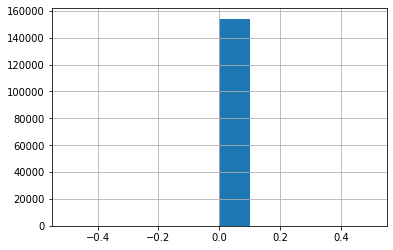

In [80]:
data[data.nameDest.str[0] == 'B'].oldBalanceDest.hist()

<AxesSubplot:>

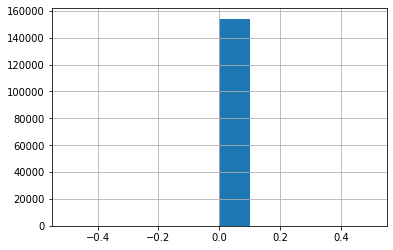

In [81]:
data[data.nameDest.str[0] == 'B'].newBalanceDest.hist()

In [82]:
data[data.nameDest.str[0] == 'B'].oldBalanceDest.sum()

0.0

In [83]:
data[data.nameDest.str[0] == 'B'].newBalanceDest.sum()

0.0

In [84]:
data[data.nameDest.str[0] == 'B'].nameDest.unique()

array(['B6467994230', 'B2732957435', 'B0740995528', 'B2269743080',
       'B4742209743'], dtype=object)

## Merchants

In [87]:
data[data.nameDest.str[0] == 'M'].nameDest.unique().shape

(34749,)

In [94]:
merchs = data[data.nameDest.str[0] == 'M']

In [97]:
merchs.shape

(3083393, 13)

### Exploring the balance behaviour for cash-out operations

In [98]:
diff_cashout = merchs[merchs.action == 'CASH_OUT'].oldBalanceDest - merchs[merchs.action == 'CASH_OUT'].newBalanceDest

In [99]:
diff_cashout.sum()

0.0

For `CASH_OUT` operations, the balance does not change. 

### Exploring the balance behaviour for payment operations

In [100]:
diff_payment = merchs[merchs.action == 'PAYMENT'].oldBalanceDest - merchs[merchs.action == 'PAYMENT'].newBalanceDest

In [101]:
diff_payment

idx
1          -3898.67
3          -5893.84
5          -4919.22
8          -9689.93
15         -6319.83
             ...   
3440375    -8227.84
3440381    -5966.13
3440382    -2709.91
3440386    -7261.09
3440387   -12357.23
Length: 794416, dtype: float64

In [102]:
diff_payment[diff_payment < 0].shape

(788373,)

In [103]:
diff_payment[diff_payment == 0].shape

(6043,)

Are these events unauthorized overdrafts?

In [119]:
merchs[(merchs.isUnauthorizedOverdraft == 1) & (merchs.action == 'PAYMENT')].shape

(6043, 13)

In [117]:
diff_payment[diff_payment == 0].shape

(6043,)

In [122]:
check = merchs[(merchs.isUnauthorizedOverdraft == 1) & (merchs.action == 'PAYMENT')].index == diff_payment[diff_payment == 0].index

In [123]:
check.all()

True

The difference in balances between the old and the new is always negative, so `PAYMENTS` increase the balance of merchant (or don't change it in case we are looking at an unauthorized overdraft). 

## Clients

In [89]:
data[data.nameDest.str[0] == 'C'].nameDest.unique().shape

(20755,)

In [90]:
data[data.nameDest.str[0] == 'C'].nameOrig.unique().shape

(18610,)

In [91]:
unique_clients = set(list(data[data.nameDest.str[0] == 'C'].nameOrig.unique()) + list(data[data.nameDest.str[0] == 'C'].nameDest.unique()))
len(unique_clients)

20756

---

# Post-processing of synthetic data with business rules for balances

In [2]:
import pandas as pd
synth = pd.read_csv("data/synth_sample.csv")

In [3]:
synth.head()

,idx,time,action,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft
0,0,0,CASH_IN,230163.11,C5831266343,M1836583048,0,0,0
1,1,1,CASH_IN,96795.66,C1838435211,M4632515968,0,0,0
2,2,2,CASH_IN,227298.43,C1911378560,M7113244499,0,0,0
3,3,3,CASH_IN,155631.49,C9648741489,M3688842852,0,0,0
4,4,4,CASH_IN,118296.85,C5502668364,M4934014946,0,0,0


In [4]:
synth.shape

(3440390, 9)

In [5]:
synth.drop('isUnauthorizedOverdraft', axis=1, inplace=True)

In [6]:
synth.shape

(3440390, 8)

In [7]:
synth.action.value_counts()

CASH_IN     1484597
CASH_OUT     804380
PAYMENT      794416
TRANSFER     202906
DEBIT        154091
Name: action, dtype: int64

In [8]:
synth.isFlaggedFraud.value_counts()

0    3440390
Name: isFlaggedFraud, dtype: int64

In [9]:
synth.isFraud.value_counts()

0    3438999
1       1391
Name: isFraud, dtype: int64

In [11]:
from pandas import DataFrame as pdDataframe

def calculate_balance_with_interaction(df):
    """
    Define the relations and interactions.
    First, we need to specify that `account_id` and `dest_account_id` refer to the same entity that we label `acc_id`.
    Then, for each column representing an entity `acc_id`, we specify the map attribute to columns.
    For instance, the attribute `balance` is represented by the column `balance` for the `account_id` but by the column `dest_balance` for the `dest_account_id`.
    """
    relations = {
        'acc_id': {
            'nameOrig': {'balance': 'newBalanceOrig'},
            'nameDest': {'balance': 'newBalanceDest'},
        }
    }
    
    
    """
    For each entity defined above, let us define a state per attribute.
    """
    entity_state = {'acc_id': {'balance': {}}}
    
    
    
    # Our balances DF
    calculated_df = pdDataframe({'oldBalanceOrig': [0.] * df.shape[0], 
                                 'newBalanceOrig': [0.] * df.shape[0],
                                 'oldBalanceDest': [0.] * df.shape[0],
                                 'newBalanceDest': [0.] * df.shape[0],
                                 'isUnauthorizedOverdraft': [0.] * df.shape[0] 
                                })
    
    """
    The transaction logic over the origin and destination balances:
    - CASH_IN: only the origBalances are updated (+)
    - CASH_OUT: only the origBalances are updated (-)
    - PAYMENT: both balances are updated (orig - , dest +)
    - TRANSFER: both balances are updated (orig -, dest +)
    - DEBIT: only the origBalances are updated (-)
    """
    
    ops_map = {
            'CASH_IN': [1, 0],
            'CASH_OUT': [-1, 0],
            'PAYMENT': [-1, 1],
            'TRANSFER': [-1, 1],
            'DEBIT': [-1, 0]
    
    }
        
    for i, r in df.iterrows():
        
        '''
        We need to initialize the attributes of the entitie.
        In this example, we simply initialize the state with 0. but this is use-case based.
        '''
        for entity, rel_entities in relations.items():
            for col_rel, col_fields in rel_entities.items():
                for state, col in col_fields.items():
                    if r[col_rel] not in entity_state[entity][state]:
                        entity_state[entity][state][r[col_rel]] = 0.

        '''
        Let us define here if the transaction logic:
        We need to update the old balances.
        We need to update the balances according to the constraints. 
        We need to then update the entity state with the balances
        '''
        
        # First, let's update the old balance variables
        calculated_df.at[i, 'oldBalanceOrig'] = entity_state['acc_id']['balance'][r['nameOrig']]
        calculated_df.at[i, 'oldBalanceDest'] = entity_state['acc_id']['balance'][r['nameDest']]
        
        # Now, let's compute the new balance given the constraints
        
        # If potentially fraudulent, operation is rejected and balances stay the same
        if r.isFlaggedFraud == 1:
            calculated_df.at[i, 'newBalanceOrig'] = calculated_df.at[i, 'oldBalanceOrig'] 
            calculated_df.at[i, 'newBalanceDest'] = calculated_df.at[i, 'oldBalanceDest']    
            continue
            
        # Everything else follows the transaction logic
        else:
            op = r['action']
            amount = r['amount']
            
            
            # Checking if this is a possible overdraft
            if (op in ['CASH_OUT', 'PAYMENT', 'TRANSFER', 'DEBIT']) and (amount > calculated_df.at[i, 'oldBalanceOrig']):
                calculated_df.at[i, 'isUnauthorizedOverdraft'] = 1
                calculated_df.at[i, 'newBalanceOrig'] = calculated_df.at[i, 'oldBalanceOrig'] 
                calculated_df.at[i, 'newBalanceDest'] = calculated_df.at[i, 'oldBalanceDest']
                continue
            else:
                calculated_df.at[i, 'isUnauthorizedOverdraft'] = 0
                calculated_df.at[i, 'newBalanceOrig'] = calculated_df.at[i, 'oldBalanceOrig'] + (amount*ops_map[op][0])
                calculated_df.at[i, 'newBalanceDest'] = calculated_df.at[i, 'oldBalanceDest'] + (amount*ops_map[op][1])
        
        # Finishg by updating the state of each entity 
        for entity, rel_entities in relations.items():
            for col_rel, col_fields in rel_entities.items():
                for state, col in col_fields.items():
                    entity_state[entity][state][r[col_rel]] = calculated_df.at[i, col]
     
    # Adjusting a datatype
    calculated_df.isUnauthorizedOverdraft = calculated_df.isUnauthorizedOverdraft.astype(int)
    
    return calculated_df

In [12]:
out=calculate_balance_with_interaction(synth)

In [13]:
out.shape

(3440390, 5)

In [14]:
complete_synth = pd.concat([synth, out], axis=1)

In [15]:
complete_synth.head()

,idx,time,action,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isUnauthorizedOverdraft
0,0,0,CASH_IN,230163.11,C5831266343,M1836583048,0,0,0.0,230163.11,0.0,0.0,0
1,1,1,CASH_IN,96795.66,C1838435211,M4632515968,0,0,0.0,96795.66,0.0,0.0,0
2,2,2,CASH_IN,227298.43,C1911378560,M7113244499,0,0,0.0,227298.43,0.0,0.0,0
3,3,3,CASH_IN,155631.49,C9648741489,M3688842852,0,0,0.0,155631.49,0.0,0.0,0
4,4,4,CASH_IN,118296.85,C5502668364,M4934014946,0,0,0.0,118296.85,0.0,0.0,0


In [16]:
complete_synth.action.value_counts()

CASH_IN     1484597
CASH_OUT     804380
PAYMENT      794416
TRANSFER     202906
DEBIT        154091
Name: action, dtype: int64

In [17]:
complete_synth.isUnauthorizedOverdraft.value_counts()

0    3397548
1      42842
Name: isUnauthorizedOverdraft, dtype: int64

% of unauthorized overdraft

In [20]:
(complete_synth.isUnauthorizedOverdraft.value_counts()[1]/complete_synth.shape[0])*100

1.2452657983542563

Original dataset has 1.67%

In [21]:
complete_synth.to_csv("data/synth_sample_with_balances.csv", sep=',', index=False, header=True)

---

Quick validation of the per-class ocurrence of unauthorized overdrafts 

Synthetic dataset

In [6]:
import pandas as pd
synth = pd.read_csv("data/synth_sample_with_balances.csv")

TRANSFER    0.425992
CASH_OUT    0.388252
PAYMENT     0.111190
DEBIT       0.074566
Name: action, dtype: float64

In [17]:
synth_freqs=(synth[synth.isUnauthorizedOverdraft==1].action.value_counts())/(synth[synth.isUnauthorizedOverdraft==1].shape[0])
synth_freqs.sort_values()

DEBIT       0.074566
PAYMENT     0.111190
CASH_OUT    0.388252
TRANSFER    0.425992
Name: action, dtype: float64

Original dataset

In [18]:
# Importing YData's packages
from ydata.platform.datasources import DataSources
from ydata.metadata import Metadata

# Creating a Dataset from the Data Source
ds = DataSources.get(uid='1cb44d2e-6fd8-4f80-8411-cc34db893f88', namespace='47141dbf-73cf-45ed-9c4f-3ba32e5d1663')
original = ds.read().to_pandas()

In [19]:
orig_freqs = (original[original.isUnauthorizedOverdraft==1].action.value_counts())/(original[original.isUnauthorizedOverdraft==1].shape[0])
orig_freqs.sort_values()

PAYMENT     0.104744
TRANSFER    0.209072
DEBIT       0.288874
CASH_OUT    0.397310
Name: action, dtype: float64